# **DELITOS ARGENTINA - ANALÍTICA DESCRIPTIVA**

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import json


#predeterminado

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

#ver todo

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_excel('C:/Dropbox/ProyectoPP3/delitos 14-22.xlsx',
                 parse_dates = {'Timestamp': [0]}, index_col = 0)


In [5]:
df = df.reset_index()
df['Timestamp'] = df['Timestamp'].dt.year

In [6]:
df.head(4)

,Timestamp,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,2,Ciudad Autónoma de Buenos Aires,1,Homicidios dolosos,185,200.0
1,2014,2,Ciudad Autónoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,2,Ciudad Autónoma de Buenos Aires,3,Muertes en Accidentes Viales,82,102.0
3,2014,2,Ciudad Autónoma de Buenos Aires,4,Homicidios culposos por otros hechos,23,24.0


In [7]:
df.shape

(10224, 7)

In [8]:
df.tail(4)

,Timestamp,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
10220,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",29_8,Otros delitos previstos en leyes especiales,3082,NaN
10221,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",30,Contravenciones,557,NaN
10222,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",31,Suicidios (consumados),22,22.0
10223,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",32,Delitos contra el orden económico y financiero,2,NaN


In [9]:
df2 = df.drop(['provincia_id', 'codigo_delito_snic_id'], axis=1)

In [10]:
df2.head(2)

,Timestamp,provincia_nombre,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0


In [11]:
df3 = df2.rename(columns={'provincia_nombre':'Provincia',
                                   'codigo_delito_snic_nombre':'Delitos',
                                     'cantidad_hechos':'Hechos', 'cantidad_victimas':'Victimas'})


In [12]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102.0
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24.0
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175.0
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562.0
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133.0
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623.0
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0.0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291.0


In [13]:
df3.dtypes

Timestamp      int32
Provincia     object
Delitos       object
Hechos         int64
Victimas     float64
dtype: object

In [14]:
df3.shape

(10224, 5)

In [15]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102.0
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24.0
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175.0
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562.0
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133.0
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623.0
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0.0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291.0


In [16]:
df3.isnull().any()

Timestamp    False
Provincia    False
Delitos      False
Hechos       False
Victimas      True
dtype: bool

In [17]:
# Reemplazar valores nulos
df3 = df3.fillna(0)

In [18]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102.0
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24.0
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175.0
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562.0
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133.0
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623.0
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0.0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291.0


In [19]:
# Reemplazar valores float por valores int
df3['Victimas'] = df3['Victimas'].astype(int)

In [20]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291


In [21]:
# [Dataset recervado para estudios proximos]
dff = df3

In [22]:
dff

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175
...,...,...,...,...,...
10219,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Contrabando de elementos nucleares agresivos q...,0,0
10220,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Otros delitos previstos en leyes especiales,3082,0
10221,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Contravenciones,557,0
10222,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Suicidios (consumados),22,22


In [23]:
df3.head()

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175


# **ANÁLISIS DE DATOS**

- TOTAL DE HECHOS POR AÑO

- TOTAL DE VICTIMAS POR AÑO
   
- TOTAL DE HECHOS POR DELITO
 
- LA PROVINCIA CON MAS VICTIMAS
   
- EL AÑO CON MAS HECHOS
    
- TOTAL DE HECHOS POR PROVINCIA
   
- HECHOS POR DELITO POR AÑO
    
- TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
    
- RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS

In [24]:
#1) TOTAL DE HECHOS POR AÑO
resultados_3_1 = []

for añ, h in df3.groupby('Timestamp'):
    mas_hechos_1= h['Hechos'].sum()

    resultados_3_1.append({
        'Año': añ,
        'Total Hechos': mas_hechos_1  
    })

resultados_df3_1 = pd.DataFrame(resultados_3_1)
resultados_df3_1



,Año,Total Hechos
0,2014,1597471
1,2015,1553996
2,2016,1505672
3,2017,1658123
4,2018,1733799
5,2019,1919503
6,2020,1627348
7,2021,1731131
8,2022,1826630


In [25]:
#2) TOTAL DE VICTIMAS POR AÑO
resultados_3_1_1 = []

for añ_1, h_1 in df3.groupby('Timestamp'):
    mas_victim_1= h_1['Victimas'].sum()

    resultados_3_1_1.append({
        'Año': añ_1,
        'Total Victimas': mas_victim_1  
    })

resultados_df3_1_1 = pd.DataFrame(resultados_3_1_1)
resultados_df3_1_1

,Año,Total Victimas
0,2014,389754
1,2015,384499
2,2016,346066
3,2017,374387
4,2018,365147
5,2019,371498
6,2020,325463
7,2021,386529
8,2022,408904


<Axes: xlabel='Timestamp'>

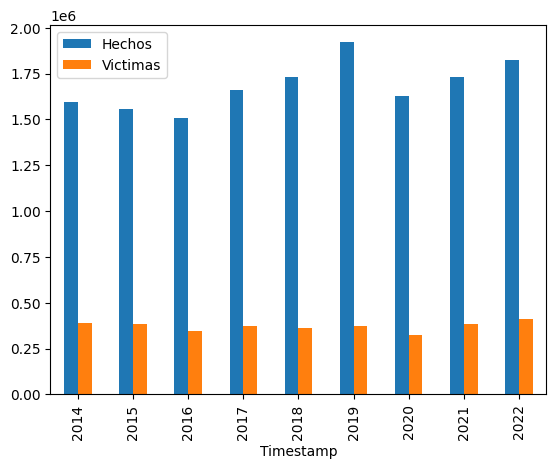

In [26]:
# GRAFICO
hechos_victimas_años = df3.groupby('Timestamp')[['Hechos', 'Victimas']].sum()
hechos_victimas_años.plot(kind='bar', legend= 'TotalHechos')

In [27]:
#3) TOTAL DE HECHOS POR DELITO
delitos_en_hechos = df3.groupby(by= ['Delitos'])['Hechos'].sum()
delitos_en_hechos.sort_values(ascending= False)

Delitos
Robos (excluye los agravados por el resultado de lesiones y/o muertes)                          3694732
Hurtos                                                                                          2503450
Amenazas                                                                                        1687736
Lesiones dolosas                                                                                1362878
Otros delitos contra la propiedad                                                               1109023
Lesiones culposas en Accidentes Viales                                                           776442
Contravenciones                                                                                  772217
Otros delitos contra las personas                                                                456354
Delitos contra la administración pública                                                         373084
Otros delitos previstos en leyes especiales             

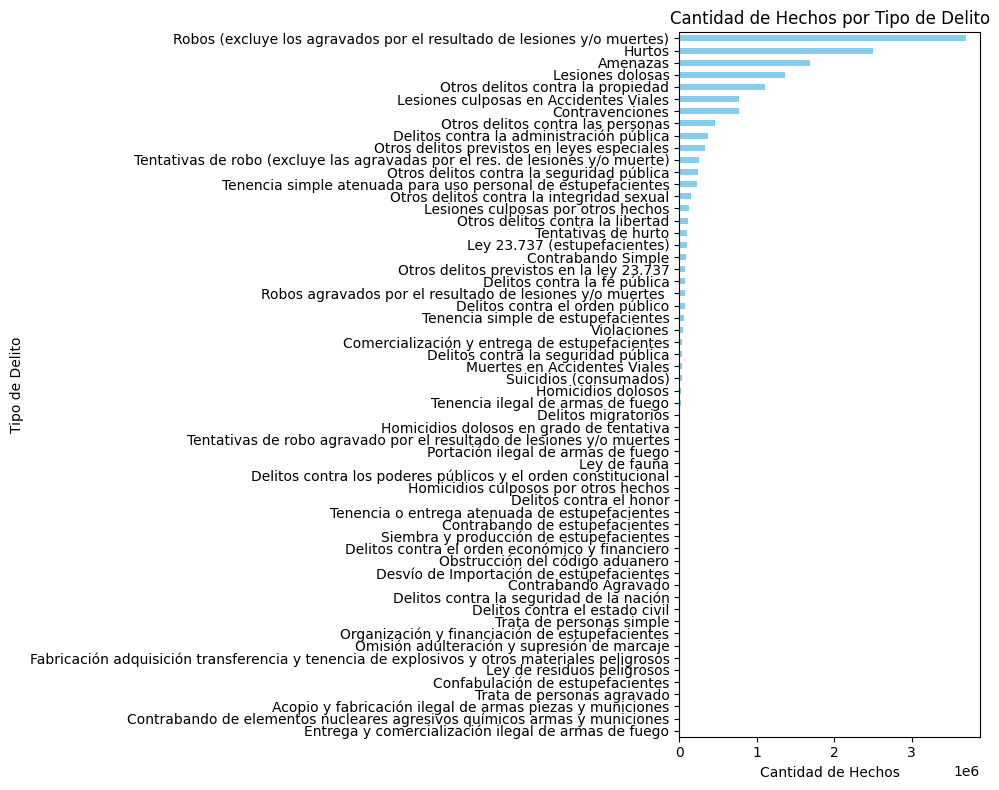

In [28]:
# GRAFICO
delitos_en_hechos = delitos_en_hechos.sort_values(ascending= True)
plt.figure(figsize=(10, 8))
delitos_en_hechos.plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de Hechos')
plt.ylabel('Tipo de Delito')
plt.title('Cantidad de Hechos por Tipo de Delito')
plt.tight_layout()

plt.show()

In [29]:
#4) LA PROVINCIA CON MAS VICTIMAS
resultados_2_1_1 = []

for prov_1_1, group_df in df3.groupby('Provincia'):
    total_victimas_1_1 = group_df['Victimas'].sum()
    
    resultados_2_1_1.append({
        'Provincias': prov_1_1,
        'Víctimas': total_victimas_1_1
    })

resultados_df2_2_2 = pd.DataFrame(resultados_2_1_1)
resultados_df2_2_2 = resultados_df2_2_2.set_index(resultados_df2_2_2['Provincias'])
resultados_df2_2_2 = resultados_df2_2_2.drop('Provincias', axis=1)
resultados_df2_2_2.sort_values(by = 'Víctimas', ascending= False).head(1)


,Víctimas
Provincias,
Buenos Aires,972890


In [30]:
#5) EL AÑO CON MAS HECHOS
resultados_df3_1.sort_values(by= 'Total Hechos', ascending= False).head(1)

,Año,Total Hechos
5,2019,1919503


In [31]:
#6) TOTAL DE HECHOS POR PROVINCIA
resultados_hechos_prov = []

for prov_hechos, grupo_hechos in df3.groupby('Provincia'):
    total_hechos_prov = grupo_hechos['Hechos'].sum()
    
    resultados_hechos_prov.append({
        'Provincias': prov_hechos,
        'Hechos': total_hechos_prov
    })

resultados_hechos_prov_df = pd.DataFrame(resultados_hechos_prov)
resultados_hechos_prov_df = resultados_hechos_prov_df.set_index(resultados_hechos_prov_df['Provincias'])
resultados_hechos_prov_df = resultados_hechos_prov_df.drop('Provincias', axis=1)
resultados_hechos_prov_df.sort_values(by = 'Hechos', ascending= False)

,Hechos
Provincias,
Buenos Aires,3989724
Ciudad Autónoma de Buenos Aires,1687784
Córdoba,1612040
Mendoza,1162345
Santa Fe,1144926
Salta,1073133
Tucumán,544420
Entre Ríos,425796
San Juan,396782


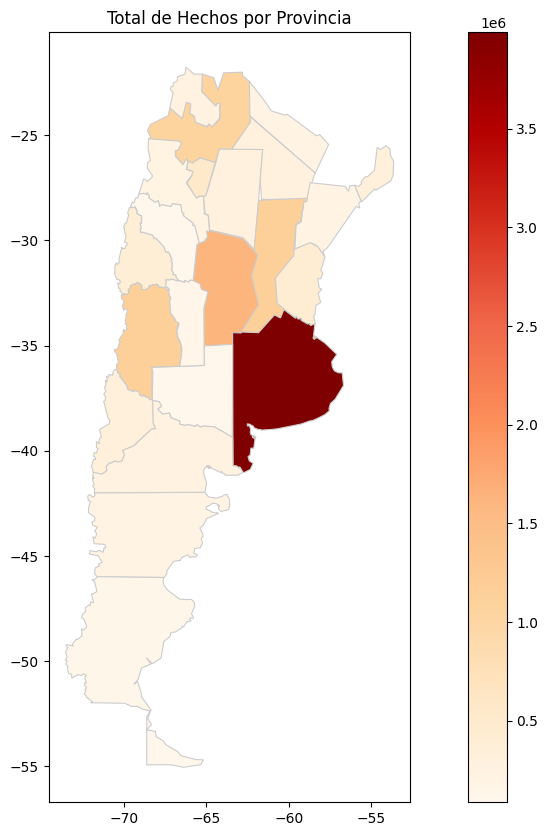

In [33]:
# GRAFICO
provin = gpd.read_file('C:/Dropbox/ProyectoPP3/ProvinciasArgentina.geojson')

provin = provin.merge(resultados_hechos_prov_df, left_on='nombre', right_index=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
provin.plot(column='Hechos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total de Hechos por Provincia')
plt.show()

In [34]:
#7) HECHOS POR DELITO POR AÑO
delitos_en_hechos_años = df3.groupby(['Timestamp', 'Delitos'])['Hechos'].sum()
delitos_en_hechos_años

Timestamp  Delitos                                                                      
2014       Amenazas                                                                         184092
           Delitos contra el estado civil                                                      208
           Delitos contra el honor                                                             856
           Delitos contra el orden público                                                   15208
           Delitos contra la administración pública                                          30616
                                                                                             ...  
2022       Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte)     24663
           Tentativas de robo agravado por el resultado de lesiones y/o muertes               1403
           Trata de personas agravado                                                           82
           Trata de 

In [35]:
#8) TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
lesiones_dolosas_df = df3[df3['Delitos'] == 'Lesiones dolosas']
provincia_delitos = lesiones_dolosas_df.groupby('Provincia')['Hechos'].sum()
top_3_provincias = provincia_delitos.sort_values(ascending= False)
top_3_provincias.head(3)

Provincia
Buenos Aires                       419184
Ciudad Autónoma de Buenos Aires    133658
Mendoza                            128034
Name: Hechos, dtype: int64

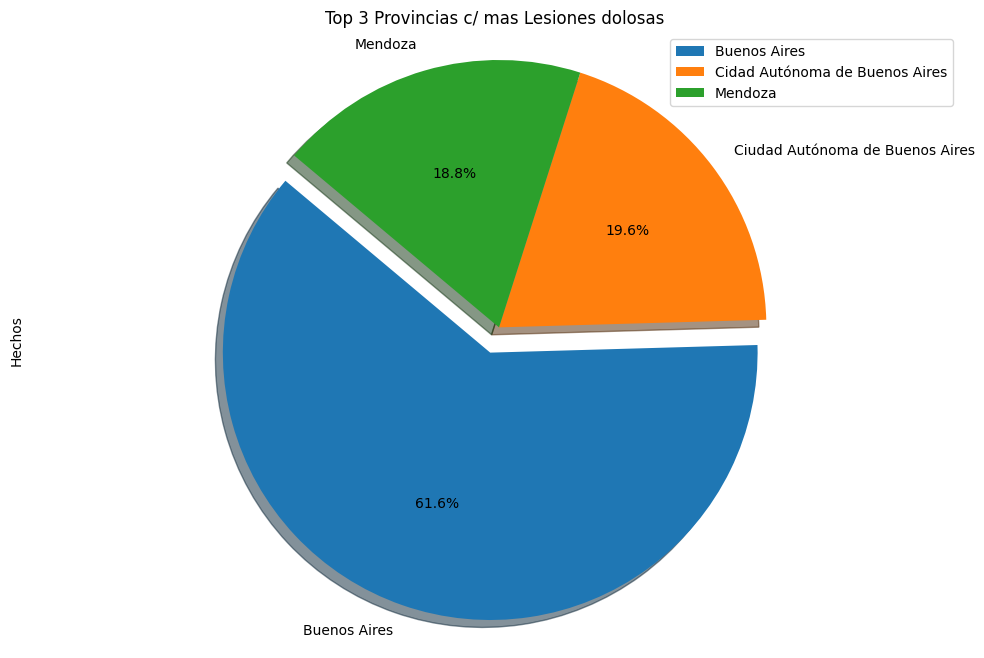

In [36]:
# GRAFICO
_lesiones_dolosas = df3[df3['Delitos'] == 'Lesiones dolosas']
total_lesiones_dolosas = _lesiones_dolosas.groupby('Provincia')['Hechos'].sum()
top_3_provin = total_lesiones_dolosas.sort_values(ascending=False).head(3)

plt.figure(figsize=(12,8))
explode = [0.1, 0.0, 0.00]
top_3_provin.plot(kind= 'pie', autopct='%1.1f%%', startangle = 140, explode=explode, shadow=True)
plt.title('Top 3 Provincias c/ mas Lesiones dolosas')
plt.legend(['Buenos Aires', 'Cidad Autónoma de Buenos Aires', 'Mendoza'])
plt.axis('equal')
plt.show()


In [37]:
#9) RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS
homicidios_culposos = df3[df3['Delitos'] == 'Homicidios culposos por otros hechos']
provincia_delitos_2 = homicidios_culposos.groupby('Provincia')[['Hechos','Victimas']].sum()
ranking_homicidios_culposos = provincia_delitos_2.sort_values(by= 'Victimas',ascending= False)
ranking_homicidios_culposos = ranking_homicidios_culposos.reset_index()
ranking_homicidios_culposos

,Provincia,Hechos,Victimas
0,Buenos Aires,1636,1849
1,Mendoza,1283,1332
2,Chaco,817,853
3,Tucumán,619,670
4,Santa Fe,295,336
5,Córdoba,278,295
6,Ciudad Autónoma de Buenos Aires,237,261
7,Formosa,165,165
8,Misiones,131,131
9,Corrientes,110,112


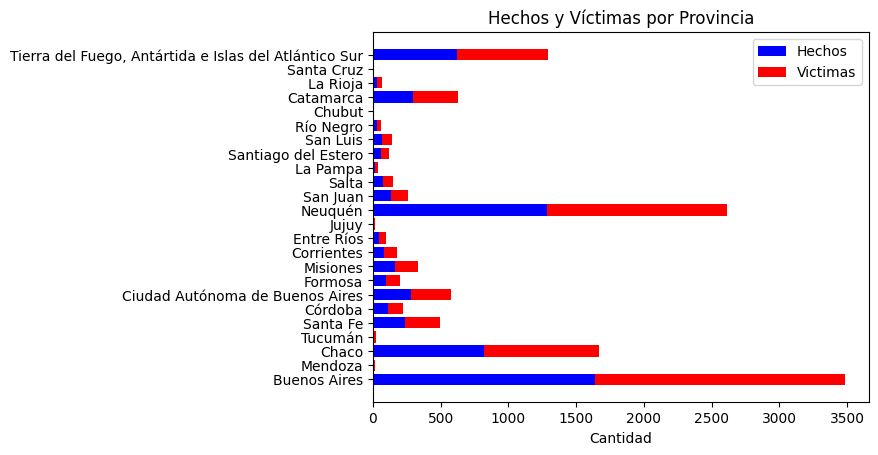

In [38]:
# GRAFICO
ranking_homicidios_culposos = pd.DataFrame(ranking_homicidios_culposos)

provinci = ranking_homicidios_culposos['Provincia'].tolist()
h = ranking_homicidios_culposos.groupby('Provincia')['Hechos'].sum()
v = ranking_homicidios_culposos.groupby('Provincia')['Victimas'].sum()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Barra para hechos
ax.barh(provinci, h, color='blue', label='Hechos')

# Barra para víctimas
ax.barh(provinci, v, color='red', label='Victimas', left=h)

# Personalizar el gráfico
ax.set_xlabel('Cantidad')
ax.set_title('Hechos y Víctimas por Provincia')
ax.legend()

# Mostrar el gráfico
plt.show()


# **MISMO ANÁLISIS: SQLITE**

In [39]:
import sqlite3
dfsq = df3

In [40]:
dfsq.head(2)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68


In [41]:
conn = sqlite3.connect('Delitos.db')

In [42]:
conn.execute('''CREATE TABLE IF NOT EXISTS delitos(Timestamp, date,
             Provincia str,
             Delitos str,
             Hechos int,
             Victimas int)''')

In [43]:
dfsq.to_sql('delitos', conn, if_exists='replace', index=False)

10224

In [44]:
dfsq = pd.read_sql_query('SELECT * from delitos', conn)
dfsq.head(5)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175


- TOTAL DE HECHOS POR AÑO
  
- TOTAL DE VICTIMAS POR AÑO
  
- TOTAL DE HECHOS POR DELITO
  
- LA PROVINCIA CON MAS VICTIMAS
  
- EL AÑO CON MAS HECHOS
  
- TOTAL DE HECHOS POR PROVINCIA
  
- HECHOS POR DELITO POR AÑO
  
- TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
  
- RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS

In [45]:
#1)TOTAL DE HECHOS POR AÑO
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Timestamp FROM delitos GROUP BY Timestamp' , conn)
dfsq


,Total Hechos,Timestamp
0,1597471,2014
1,1553996,2015
2,1505672,2016
3,1658123,2017
4,1733799,2018
5,1919503,2019
6,1627348,2020
7,1731131,2021
8,1826630,2022


In [46]:
#2) TOTAL DE VICTIMAS POR AÑO
dfsq = pd.read_sql_query('SELECT SUM(Victimas) AS "Total Hechos", Timestamp FROM delitos GROUP BY Timestamp' , conn)
dfsq

,Total Hechos,Timestamp
0,389754,2014
1,384499,2015
2,346066,2016
3,374387,2017
4,365147,2018
5,371498,2019
6,325463,2020
7,386529,2021
8,408904,2022


In [47]:
#3) TOTAL DE HECHOS POR DELITO
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Delitos FROM delitos GROUP BY Delitos ORDER BY SUM(Hechos) DESC', conn)
dfsq

,Total Hechos,Delitos
0,3694732,Robos (excluye los agravados por el resultado ...
1,2503450,Hurtos
2,1687736,Amenazas
3,1362878,Lesiones dolosas
4,1109023,Otros delitos contra la propiedad
5,776442,Lesiones culposas en Accidentes Viales
6,772217,Contravenciones
7,456354,Otros delitos contra las personas
8,373084,Delitos contra la administración pública
9,339477,Otros delitos previstos en leyes especiales


In [48]:
#4) LA PROVINCIA CON MAS VICTIMAS
dfsq = pd.read_sql_query('SELECT SUM(Victimas) AS "Total Victimas", Provincia FROM delitos GROUP BY Provincia ORDER BY SUM(Victimas) DESC', conn)
dfsq.head(1)

,Total Victimas,Provincia
0,972890,Buenos Aires


In [49]:
#5) EL AÑO CON MAS HECHOS
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Timestamp FROM delitos GROUP BY Timestamp ORDER BY SUM(Hechos) DESC', conn)
dfsq.head(1)

,Total Hechos,Timestamp
0,1919503,2019


In [50]:
#6) TOTAL DE HECHOS POR PROVINCIA
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Provincia FROM delitos GROUP BY Provincia', conn)
dfsq

,Total Hechos,Provincia
0,3989724,Buenos Aires
1,226992,Catamarca
2,270816,Chaco
3,202211,Chubut
4,1687784,Ciudad Autónoma de Buenos Aires
5,206079,Corrientes
6,1612040,Córdoba
7,425796,Entre Ríos
8,208405,Formosa
9,256196,Jujuy


In [51]:
#7) HECHOS POR DELITO POR AÑO
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Delitos, Timestamp FROM delitos GROUP BY Delitos, Timestamp', conn)
dfsq

,Total Hechos,Delitos,Timestamp
0,73,Acopio y fabricación ilegal de armas piezas y ...,2017
1,47,Acopio y fabricación ilegal de armas piezas y ...,2018
2,65,Acopio y fabricación ilegal de armas piezas y ...,2019
3,59,Acopio y fabricación ilegal de armas piezas y ...,2020
4,56,Acopio y fabricación ilegal de armas piezas y ...,2021
...,...,...,...
421,4141,Violaciones,2018
422,5461,Violaciones,2019
423,5616,Violaciones,2020
424,6794,Violaciones,2021


In [52]:
#8) TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Hechos", Delitos, Provincia FROM delitos WHERE Delitos LIKE "Lesiones dolosas" GROUP BY Provincia ORDER BY SUM(Hechos) DESC', conn)
dfsq.head(3)

,Hechos,Delitos,Provincia
0,419184,Lesiones dolosas,Buenos Aires
1,133658,Lesiones dolosas,Ciudad Autónoma de Buenos Aires
2,128034,Lesiones dolosas,Mendoza


In [53]:
#9) RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS
dfsq = pd.read_sql_query('SELECT SUM(Victimas) AS "Victimas", Delitos, Provincia FROM delitos WHERE Delitos LIKE "Homicidios culposos por otros hechos" GROUP BY Provincia ORDER BY SUM(Victimas) DESC', conn)
dfsq

,Victimas,Delitos,Provincia
0,1849,Homicidios culposos por otros hechos,Buenos Aires
1,1332,Homicidios culposos por otros hechos,Mendoza
2,853,Homicidios culposos por otros hechos,Chaco
3,670,Homicidios culposos por otros hechos,Tucumán
4,336,Homicidios culposos por otros hechos,Santa Fe
5,295,Homicidios culposos por otros hechos,Córdoba
6,261,Homicidios culposos por otros hechos,Ciudad Autónoma de Buenos Aires
7,165,Homicidios culposos por otros hechos,Formosa
8,131,Homicidios culposos por otros hechos,Misiones
9,112,Homicidios culposos por otros hechos,Corrientes


***GRÁFICOS***

In [54]:
df_g = dff

In [55]:
df_g.head(4)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24


<Axes: xlabel='Timestamp'>

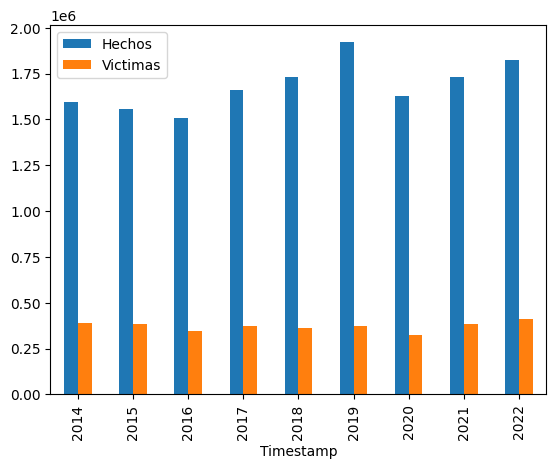

In [56]:
#HECHOS POR AÑO CON VICTIMAS Y HECHOS
df_grouped = df_g.groupby(df_g['Timestamp'])[['Hechos', 'Victimas']].sum()

df_grouped.plot(kind='bar', legend= 'TotalHechos')

<Axes: ylabel='Provincia'>

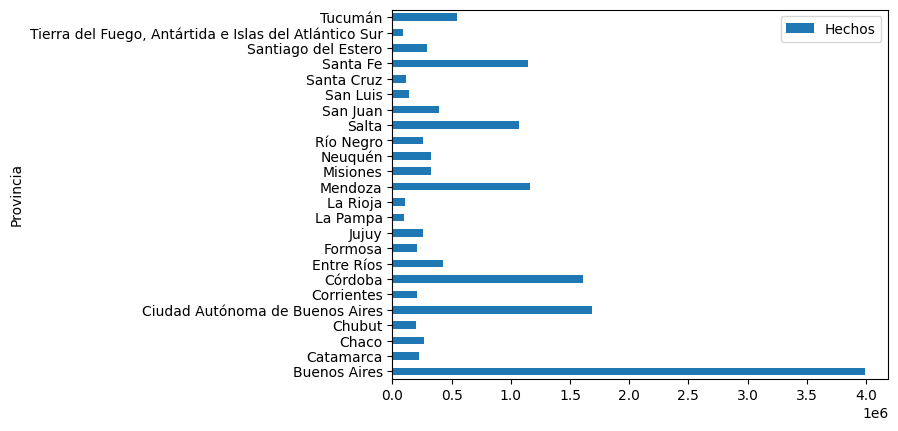

In [57]:
#HECHOS POR DELITO
df_g.groupby('Provincia')['Hechos'].sum().plot(kind='barh', legend='Años' )

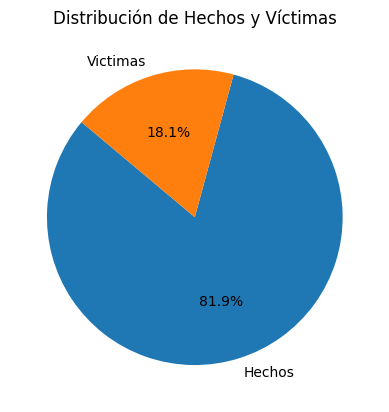

In [58]:
suma_hechos = df_g['Hechos'].sum()
suma_victimas = df_g['Victimas'].sum()
valores = [suma_hechos, suma_victimas]
categorias = ['Hechos', 'Victimas']
plt.pie(valores, labels= categorias, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Hechos y Víctimas')
plt.show()


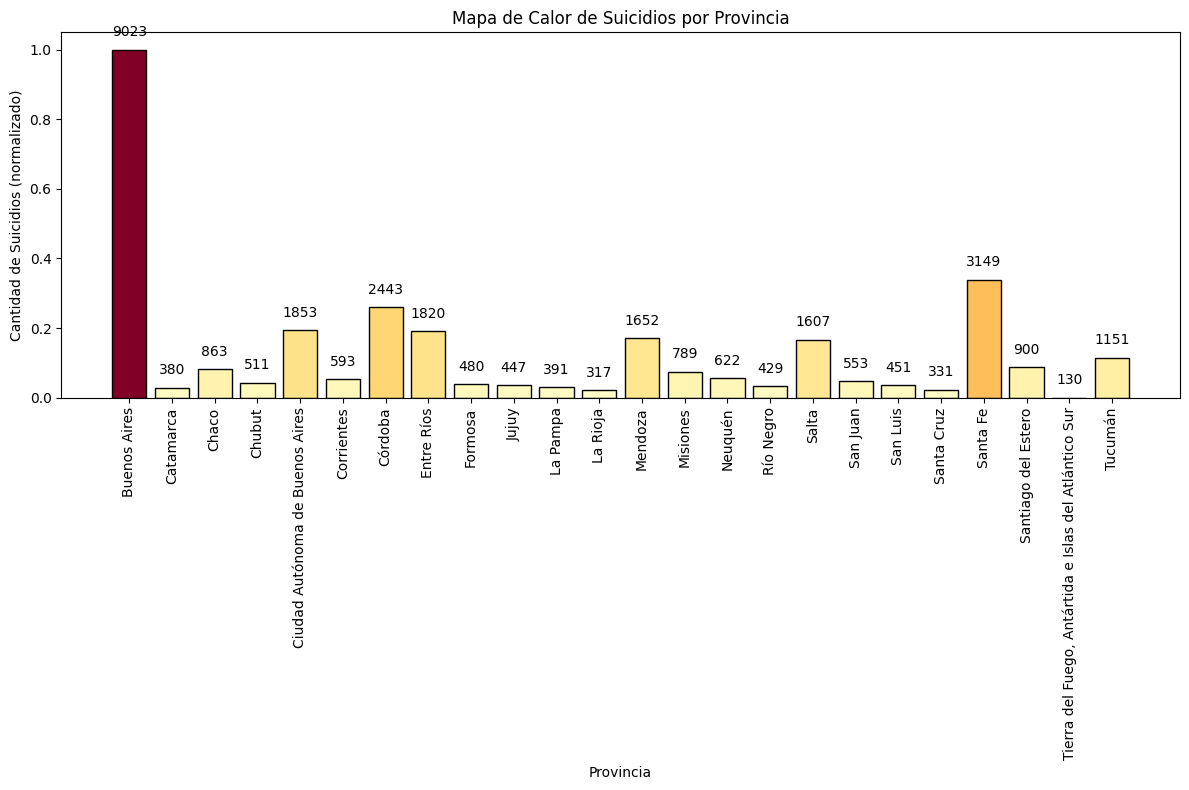

In [59]:
df_suicidios = df_g[df_g['Delitos'] == 'Suicidios (consumados)']

suicidios = df_suicidios.groupby('Provincia')['Hechos'].sum()

min_suicidios = suicidios.min()
max_suicidios = suicidios.max()
suicidios_normalized = (suicidios - min_suicidios) / (max_suicidios - min_suicidios)

plt.figure(figsize=(12, 8))

x = np.arange(len(suicidios_normalized))

for i, (provincia, valor_normalizado) in enumerate(zip(suicidios.index, suicidios_normalized)):
    color = plt.cm.YlOrRd(valor_normalizado)
    # Ajusta la altura de las barras según los valores normalizados
    plt.bar(i, valor_normalizado, color=color, label=provincia, edgecolor='k')
    plt.text(i, valor_normalizado + 0.05, str(suicidios[provincia]), ha='center', va='center', fontsize=10)

plt.xticks(x, suicidios.index, rotation=90, fontsize=10)  
plt.title('Mapa de Calor de Suicidios por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Suicidios (normalizado)')
plt.tight_layout()

plt.show()

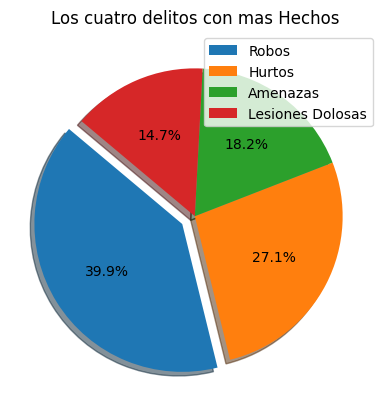

In [60]:
#LOS 4 DELITOS CON MAS HECHOS
# 1 Robos (excluye los agravados por el resultado de lesiones y/o muertes)
# 2 Hurtos
# 3 Amenazas
# 4 Lesiones dolosas
robos = df_g[df_g['Delitos'] == 'Robos (excluye los agravados por el resultado de lesiones y/o muertes)']
hurtos = df_g[df_g['Delitos'] == 'Hurtos']
amenazas = df_g[df_g['Delitos'] == 'Amenazas']
lesiones_dolosas = df_g[df_g['Delitos'] == 'Lesiones dolosas']
suma_robos = robos['Hechos'].sum()
suma_hurtos = hurtos['Hechos'].sum()
suma_amenazas = amenazas['Hechos'].sum()
suma_lesiones_d = lesiones_dolosas['Hechos'].sum()
valores = [suma_robos, suma_hurtos, suma_amenazas, suma_lesiones_d]
categorias = ['Robos', 'Hurtos', 'Amenazas', 'Lesiones Dolosas']
explode = [0.1, 0.0, 0.0, 0.00]
plt.pie(valores, autopct='%1.1f%%', startangle=140, explode= explode, shadow= True)
plt.title('Los cuatro delitos con mas Hechos')
plt.legend(categorias)
plt.show()



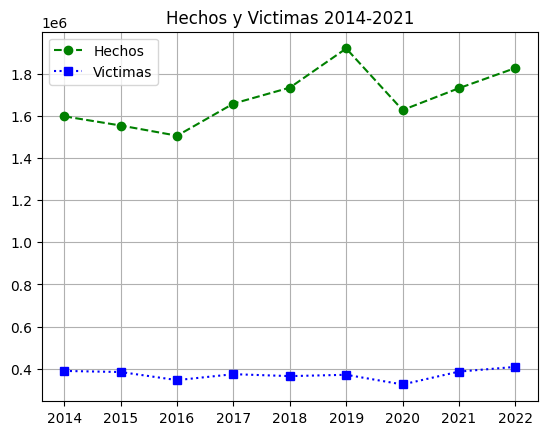

In [61]:
valoresAY = df_g.groupby('Timestamp')['Hechos'].sum()
valoresBY = df_g.groupby('Timestamp')['Victimas'].sum()
valoresX = [2014,2015,2016,2017,2018,2019,2020,2021,2022]
fig, ax = plt.subplots()
plt.plot(valoresX, valoresAY, "o--g")
plt.plot(valoresX, valoresBY, "s:b")
plt.title('Hechos y Victimas 2014-2021')
plt.legend(['Hechos', 'Victimas'])
plt.grid(True)
plt.show()